In [1]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz


--2025-07-09 12:34:06--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  12.1MB/s    in 0.2s    

2025-07-09 12:34:06 (12.1 MB/s) - ‘kddcup.data_10_percent.gz’ saved [2144903/2144903]



In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Confirm GPU
print("Num GPUs:", len(tf.config.list_physical_devices('GPU')))


Num GPUs: 0


In [13]:
# Define column names
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label"
]
data = pd.read_csv("kddcup.data_10_percent.gz", names=columns, compression='gzip')



In [14]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [15]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [16]:
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [17]:
data['label'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [18]:
data_normal = data[data['label'] == 'normal.']

In [19]:
data_normal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [20]:
# Separate features and labels
X = data.drop('label', axis=1)   #whole data but not contain label column
Y = data['label']    #only label column

In [21]:
# For training data: keep only "normal." records
X_train = X[Y == 'normal.']           #columns which has label as normal. only like data_normal.


In [22]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [23]:
Categorical_cols = ["protocol_type","service","flag"]

In [24]:
Numerical_cols = [col for col in X.columns if col not in Categorical_cols]

In [25]:
preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), Categorical_cols),
        ('num', MinMaxScaler(), Numerical_cols)
    ])

In [26]:
#Fitting and transforming training data..

X_train_processed = preprocessor.fit_transform(X_train)

In [27]:
X_train_processed.shape

(97278, 75)

In [28]:
# Access the OneHotEncoder part
ohe = preprocessor.named_transformers_['cat']
ohe.get_feature_names_out(Categorical_cols)


array(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'service_IRC', 'service_X11', 'service_auth', 'service_domain',
       'service_domain_u', 'service_eco_i', 'service_ecr_i',
       'service_finger', 'service_ftp', 'service_ftp_data',
       'service_http', 'service_ntp_u', 'service_other', 'service_pop_3',
       'service_private', 'service_red_i', 'service_shell',
       'service_smtp', 'service_ssh', 'service_telnet', 'service_tftp_u',
       'service_tim_i', 'service_time', 'service_urh_i', 'service_urp_i',
       'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF'], dtype=object)

In [29]:
print(f"Total one-hot features: {len(ohe.get_feature_names_out())}")


Total one-hot features: 37


38 (numerical) + 37 (one-hot) = 75 features total


Our autoencoder is being trained on:

One-hot encoded categorical data (37 columns)

Scaled numerical data (38 columns)

→ Total: 75 columns

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

input_dim = X_train_processed.shape[1]
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(64, activation="relu")(input_layer)
encoded = Dense(32, activation="relu")(encoded)
encoded = Dense(16, activation="relu")(encoded)

# Decoder
decoded = Dense(32, activation="relu")(encoded)
decoded = Dense(64, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 75)             │         4,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,003 (58.61 KB)

 Trainable params: 15,003 (58.61 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = autoencoder.fit(
    X_train_processed, X_train_processed,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)


Epoch 1/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0846 - val_loss: 0.0029
Epoch 2/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 3/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 4/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 5/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0016 - val_loss: 9.9325e-04
Epoch 8/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0014 - val_loss: 9.6037e-04
Epoch 9/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 9.2016e-04
Epoch 10/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 8.9505e-04
Epoch 11/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 8.6556e-04
Epoch 12/20
342/342 ━━━━━━━━━━━━

In [32]:
X_all_processed = preprocessor.transform(X)  # use the same preprocessor

# Use autoencoder to predict reconstructed values
reconstructions = autoencoder.predict(X_all_processed)

# Calculate Mean Squared Error
mse = np.mean(np.power(X_all_processed - reconstructions, 2), axis=1)


15439/15439 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step


In [33]:
# Calculate threshold using normal data only
threshold = np.percentile(mse[Y == 'normal.'], 95)
print("Reconstruction error threshold:", threshold)

# Predict: 1 = anomaly (attack), 0 = normal
y_pred = (mse > threshold).astype(int)
y_true = (Y != 'normal.').astype(int)  # 1 = attack, 0 = normal


Reconstruction error threshold: 0.001001300952315618


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[ 92414   4864]
 [  2308 394435]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     97278
           1       0.99      0.99      0.99    396743

    accuracy                           0.99    494021
   macro avg       0.98      0.97      0.98    494021
weighted avg       0.99      0.99      0.99    494021



In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Precision: 0.9878186521879594
Recall: 0.9941826320817254
F1 Score: 0.9909904251283224


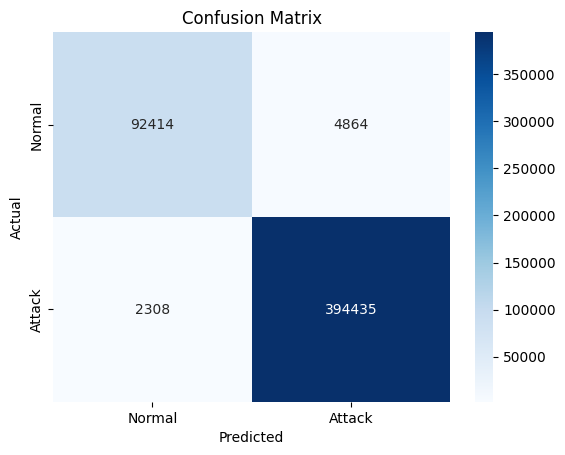

In [37]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


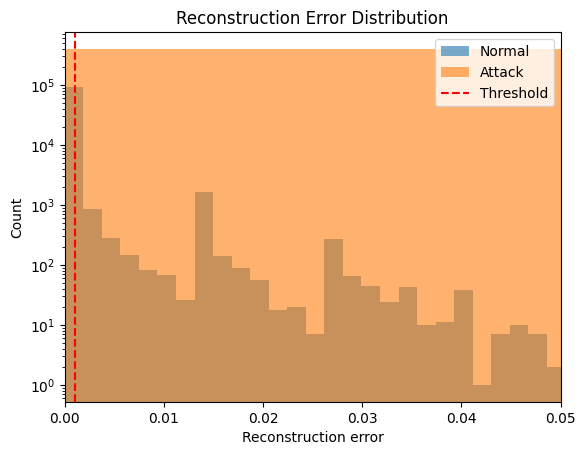

In [39]:
plt.hist(mse[Y == 'normal.'], bins=50, alpha=0.6, label='Normal')
plt.hist(mse[Y != 'normal.'], bins=50, alpha=0.6, label='Attack')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlim(0, 0.05)
plt.yscale("log")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction error")
plt.ylabel("Count")
plt.show()


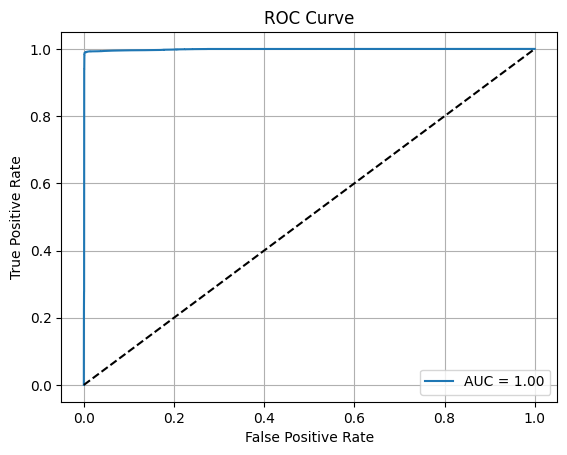

In [40]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, mse)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
for p in [90, 95, 99]:
    thr = np.percentile(mse[y_true == 0], p)
    preds = (mse > thr).astype(int)
    print(f"Threshold @ {p}%: {thr:.5f}")
    print(classification_report(y_true, preds))


Threshold @ 90%: 0.00030
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     97278
           1       0.98      1.00      0.99    396743

    accuracy                           0.98    494021
   macro avg       0.98      0.95      0.96    494021
weighted avg       0.98      0.98      0.98    494021

Threshold @ 95%: 0.00100
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     97278
           1       0.99      0.99      0.99    396743

    accuracy                           0.99    494021
   macro avg       0.98      0.97      0.98    494021
weighted avg       0.99      0.99      0.99    494021

Threshold @ 99%: 0.01451
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     97278
           1       1.00      0.99      0.99    396743

    accuracy                           0.99    494021
   macro avg       0.98      0.99      0.99    494021